<a href="https://colab.research.google.com/github/kartoone/cosc470/blob/main/keras/sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sequential model

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2020/04/12<br>
**Last modified:** 2023/06/25<br>
**Description:** Complete guide to the Sequential model.

## Setup

In [ ]:
import keras
from keras import layers
from keras import ops

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(10)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def reset_model(model):
    new_model = keras.models.clone_model(model)
    new_model.build(model.input_shape)  # Build the model with the same input shape
    return new_model

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model = reset_model(model)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(learning_rate=3.0),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7048 - loss: 0.8753 - val_accuracy: 0.9268 - val_loss: 0.2506
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9188 - loss: 0.2718 - val_accuracy: 0.9309 - val_loss: 0.2404
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9343 - loss: 0.2257 - val_accuracy: 0.9357 - val_loss: 0.2242
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9382 - loss: 0.2082 - val_accuracy: 0.9361 - val_loss: 0.2138
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9433 - loss: 0.1946 - val_accuracy: 0.9347 - val_loss: 0.2341
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9449 - loss: 0.1855 - val_accuracy: 0.9249 - val_loss: 0.2583
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9462 - loss: 0.1806 - val_accuracy: 0.9430 - val_loss: 0.1964
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9532 - loss: 0.1579 - val_accuracy: 0.

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(20, 5, strides=1, activation="sigmoid"),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(100, activation='sigmoid'),
        layers.Dense(10, activation="softmax"),
    ]
)
initial_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 20)          │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2880)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │         288,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289,630 (1.10 MB)

 Trainable params: 289,630 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 28, 28).astype("float32") / 255
x_test = x_test.reshape(10000, 28, 28).astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

initial_model = reset_model(initial_model)

initial_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

history = initial_model.fit(x_train, y_train, batch_size=64, epochs=60, validation_split=0.2)

test_scores = initial_model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3479 - loss: 1.8493 - val_accuracy: 0.8799 - val_loss: 0.4423
Epoch 2/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8793 - loss: 0.4225 - val_accuracy: 0.8947 - val_loss: 0.3457
Epoch 3/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9029 - loss: 0.3240 - val_accuracy: 0.9259 - val_loss: 0.2578
Epoch 4/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9172 - loss: 0.2711 - val_accuracy: 0.9323 - val_loss: 0.2301
Epoch 5/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9297 - loss: 0.2336 - val_accuracy: 0.9452 - val_loss: 0.1919
Epoch 6/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9403 - loss: 0.2045 - val_accuracy: 0.9479 - val_loss: 0.1803
Epoch 7/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9466 - loss: 0.1802 - val_accuracy: 0.9534 - val_loss: 0.1672
Epoch 8/60
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9496 - loss: 0.1694 - val_accuracy: 0.

In [6]:
import keras
# https://keras.io/api/datasets/cifar10/
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

[6]


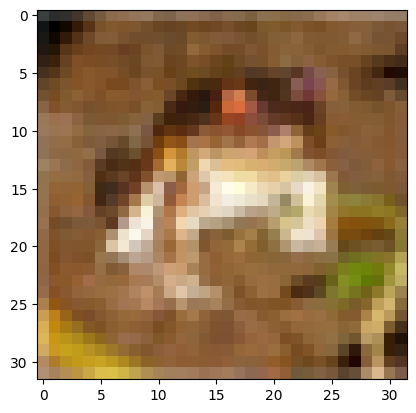

In [7]:
import numpy as np
import matplotlib.pyplot as plt

print(y_train[0])
plt.imshow(x_train[0])


In [ ]:
def reset_model(model):
    new_model = keras.models.clone_model(model)
    new_model.build(model.input_shape)  # Build the model with the same input shape
    return new_model

from keras import layers
# build a cifar10/100 compatible convolutional model
cifar_model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(20, 5, strides=1, activation="sigmoid"),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(100, activation='sigmoid'),
        layers.Dense(10, activation="softmax"),
    ]
)
cifar_model.summary()

cifar_model = reset_model(cifar_model)

cifar_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

history = cifar_model.fit(x_train, y_train, batch_size=64, epochs=65, validation_split=0.2)

test_scores = cifar_model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[6.3166226e-08 1.8446871e-08 2.4322984e-05 1.5542471e-02 8.7745779e-05
  4.7854413e-03 9.7955853e-01 1.2975665e-06 4.6559688e-08 1.0055367e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[3.0253956e-04 9.8422194e-01 5.1204632e-03 1.0742619e-04 3.5961973e-06
  1.6095267e-03 1.6288130e-04 1.4560179e-04 1.6792949e-03 6.6467104e-03]]


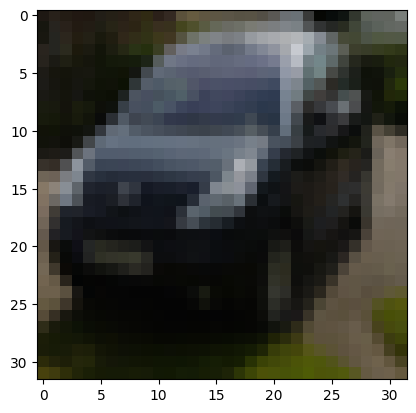

In [ ]:
import PIL

path='/content/thisisacatcropped.jpg'
img = PIL.Image.open(path)
img = img.resize((32, 32))
img = np.array(img)
img = img.astype("float32") / 255
isthisacat = cifar_model.predict(np.expand_dims(img, axis=0))
print(isthisacat)

plt.imshow(img)

plt.imshow(x_test[3838])
isthisacar = cifar_model.predict(np.expand_dims(x_test[3838], axis=0))
print(isthisacar)

## When to use a Sequential model

A `Sequential` model is appropriate for **a plain stack of layers**
where each layer has **exactly one input tensor and one output tensor**.

Schematically, the following `Sequential` model:

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = ops.ones((3, 3))
y = model(x)

is equivalent to this function:

In [ ]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = ops.ones((3, 3))
y = layer3(layer2(layer1(x)))

A Sequential model is **not appropriate** when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch
model)

## Creating a Sequential model

You can create a Sequential model by passing a list of layers to the Sequential
constructor:

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

Its layers are accessible via the `layers` attribute:

In [ ]:
model.layers

You can also create a Sequential model incrementally via the `add()` method:

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

Note that there's also a corresponding `pop()` method to remove layers:
a Sequential model behaves very much like a list of layers.

In [ ]:
model.pop()
print(len(model.layers))  # 2

Also note that the Sequential constructor accepts a `name` argument, just like
any layer or model in Keras. This is useful to annotate TensorBoard graphs
with semantically meaningful names.

In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

## Specifying the input shape in advance

Generally, all layers in Keras need to know the shape of their inputs
in order to be able to create their weights. So when you create a layer like
this, initially, it has no weights:

In [ ]:
layer = layers.Dense(3)
layer.weights  # Empty

It creates its weights the first time it is called on an input, since the shape
of the weights depends on the shape of the inputs:

In [ ]:
# Call layer on a test input
x = ops.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

Naturally, this also applies to Sequential models. When you instantiate a
Sequential model without an input shape, it isn't "built": it has no weights
(and calling
`model.weights` results in an error stating just this). The weights are created
when the model first sees some input data:

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = ops.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Once a model is "built", you can call its `summary()` method to display its
contents:

In [ ]:
model.summary()

However, it can be very useful when building a Sequential model incrementally
to be able to display the summary of the model so far, including the current
output shape. In this case, you should start your model by passing an `Input`
object to your model, so that it knows its input shape from the start:

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Note that the `Input` object is not displayed as part of `model.layers`, since
it isn't a layer:

In [ ]:
model.layers

Models built with a predefined input shape like this always have weights (even
before seeing any data) and always have a defined output shape.

In general, it's a recommended best practice to always specify the input shape
of a Sequential model in advance if you know what it is.

## A common debugging workflow: `add()` + `summary()`

When building a new Sequential architecture, it's useful to incrementally stack
layers with `add()` and frequently print model summaries. For instance, this
enables you to monitor how a stack of `Conv2D` and `MaxPooling2D` layers is
downsampling image feature maps:

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Very practical, right?


## What to do once you have a model

Once your model architecture is ready, you will want to:

- Train your model, evaluate it, and run inference. See our
[guide to training & evaluation with the built-in loops](
    /guides/training_with_built_in_methods/)
- Save your model to disk and restore it. See our
[guide to serialization & saving](/guides/serialization_and_saving/).

## Feature extraction with a Sequential model

Once a Sequential model has been built, it behaves like a
[Functional API model](/guides/functional_api/).
This means that every layer has an `input`
and `output` attribute. These attributes can be used to do neat things, like
quickly creating a model that extracts the outputs of all intermediate layers in a
Sequential model:

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = ops.ones((1, 250, 250, 3))
features = feature_extractor(x)

Here's a similar example that only extract features from one layer:

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_intermediate_layer").output,
)
# Call feature extractor on test input.
x = ops.ones((1, 250, 250, 3))
features = feature_extractor(x)

## Transfer learning with a Sequential model

Transfer learning consists of freezing the bottom layers in a model and only training
the top layers. If you aren't familiar with it, make sure to read our [guide
to transfer learning](/guides/transfer_learning/).

Here are two common transfer learning blueprint involving Sequential models.

First, let's say that you have a Sequential model, and you want to freeze all
layers except the last one. In this case, you would simply iterate over
`model.layers` and set `layer.trainable = False` on each layer, except the
last one. Like this:

```python
model = keras.Sequential([
    keras.Input(shape=(784)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10),
])

# Presumably you would want to first load pre-trained weights.
model.load_weights(...)

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)
```

Another common blueprint is to use a Sequential model to stack a pre-trained
model and some freshly initialized classification layers. Like this:

```python
# Load a convolutional base with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])

# Compile & train
model.compile(...)
model.fit(...)
```

If you do transfer learning, you will probably find yourself frequently using
these two patterns.

That's about all you need to know about Sequential models!

To find out more about building models in Keras, see:

- [Guide to the Functional API](/guides/functional_api/)
- [Guide to making new Layers & Models via subclassing](/guides/making_new_layers_and_models_via_subclassing/)